## Importing Libraries

In this block of code, we import the necessary libraries for numerical integration and symbolic computation.

- **NumPy (`np`):** The must library for any scenario.
- **SciPy (`odeint`):** A submodule of SciPy that provides functions for integrating systems of ordinary differential equations.
- **SymPy (`sm`):** A library for symbolic mathematics, allowing us to work with symbolic expressions and equations.

These libraries will help us solve and analyse the mass-spring system using both numerical and symbolic methods.


In [1]:
import numpy as np
from scipy.integrate import odeint
import sympy as sm

## Defining Symbols and Variables

In this block of code, we define the symbolic variables and the position function for the mass-spring system.
Using `sympy.symbols()`

In [12]:
t = sm.symbols('t')
m, k = sm.symbols('m k', positive=True)

q = sm.symbols('q', cls=sm.Function) # sm.Function states that the position is a function
q = q(t) # Specifying the variable


m

## Calculating Derivatives

In this block of code, we calculate the first and second derivatives of the position function with respect to time.
Using `sympy.diff()`

In [15]:
dq_dt = sm.diff(q, t) # Velocity
ddq_ddt = sm.diff(dq_dt, t) # Acceleration


## Defining Kinetic and Potential Energies

In this block of code, we define the kinetic energy $T$, potential energy $V$, and the Lagrangian $L$ for the mass-spring system.

$ T = \frac{1}{2} \ m \ (\frac{dq(t)}{dt})^2 $ 

$ V = \frac{1}{2} \ k \ q(t)^2 $

$ L = T - V $

In [20]:
T = 1/2 * m * dq_dt**2
V = 1/2 * k * q**2
L = T - V

## Formulating Lagrange's Equation

In this block of code, we formulate Lagrange's equation for the mass-spring system.

$ \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{q}}\right) - \frac{\partial L}{\partial q} = 0
 $



In [23]:
dL_d_dq = sm.diff(L, dq_dt)
L_equation = sm.diff(dL_d_dq, t) - sm.diff(L, q) # use .simplyfy() if necessary
L_equation = L_equation.simplify()

1.0*k*q(t) + 1.0*m*Derivative(q(t), (t, 2))

## Creating a Function for Solving Lagrange's Equation

In this code block, we create a function that solves Lagrange's equation numerically for the mass-spring system.

- **`lagrange_eq_func`:** This variable holds a function obtained using `sm.lambdify()`, a function from SymPy that converts the symbolic equation `L_equation` into a callable function.

- **`sm.solve(L_equation, ddq)[0]`:** This solves the equation `L_equation` for (`ddq`). The `[0]` selects the first solution returned by SymPy.

The resulting `lagrange_eq_func` is a function that takes the specified variables as input and computes the second derivative of the position with respect to time according to Lagrange's equation.

In [24]:
lagrange_eq = sm.solve(L_equation, ddq_ddt)[0]
lagrange_eq_func = sm.lambdify((q, t, m, k), lagrange_eq)


-k*q(t)/m

# Numerical Integration using Euler Method

## Overview

In numerical simulations, the Euler method is a simple and intuitive approach for solving ordinary differential equations (ODEs). It is based on the Taylor series expansion, specifically the first-order approximation.

## Euler Method

The Euler method update formula for a variable $y$ over a time step $\Delta t$ is given by:

$ y_{n+1} = y_n + \frac{dy}{dt} \Delta t $

Here:
- $ y_{n+1} $ is the updated value at the next time step.
- $ y_n $ is the current value.
- $ \frac{dy}{dt} $ is the derivative at the current state.
- $ \Delta t $ is the time step.

## Application to a Mass-Spring System

Consider a mass-spring system described by the following equations:

$ \frac{dq}{dt} = v $

$ \frac{dv}{dt} = -\frac{k}{m}q $

where $ q $ is the position and $ v $ is the velocity of the mass.

### Euler Method Steps

1. **Compute Derivatives:**

   $ \frac{dq}{dt} = v_n $

   $ \frac{dv}{dt} = -\frac{k}{m}q_n $

2. **Update State:**

   $ q_{n+1} = q_n + \frac{dq}{dt} \Delta t $
   
   $ v_{n+1} = v_n + \frac{dv}{dt} \Delta t $

3. **Updated State:**

   $ y_{n+1} = [q_{n+1}, v_{n+1}] $

### Example

Suppose the initial state is $ y_0 = [1, 0] $ (position = 1, velocity = 0) and the time step is $ \Delta t = 0.1 $, and having $\frac{k}{m} = 4$.

```python
# Initial state
y_n = [1, 0]

# Compute derivatives
dq_dt = y_n[1]
dv_dt = -4 * y_n[0]

# Update state
q_n1 = y_n[0] + dq_dt * dt
v_n1 = y_n[1] + dv_dt * dt

# Updated state
y_n1 = [q_n1, v_n1]


In [7]:
# Initial conditions & Constants
initial_conditions = [1.0, 0.0]  # initial position and velocity
m_val = 2
k_val = 2

# Function representing the system of first-order ODEs
def system_of_odes(y, t, m, k):
    q, dq_dt = y
    ddq_ddt = lagrange_eq_func(q, t, m, k)
    return [dq_dt, ddq_ddt]

# Time points for numerical solution
time_points = np.linspace(0, 10, 100)

# Solve the system of ODEs
solution = odeint(system_of_odes, initial_conditions, time_points, args=(m_val, k_val))

# Extract position and velocity from the solution
positions = solution[:, 0]
velocities = solution[:, 1]


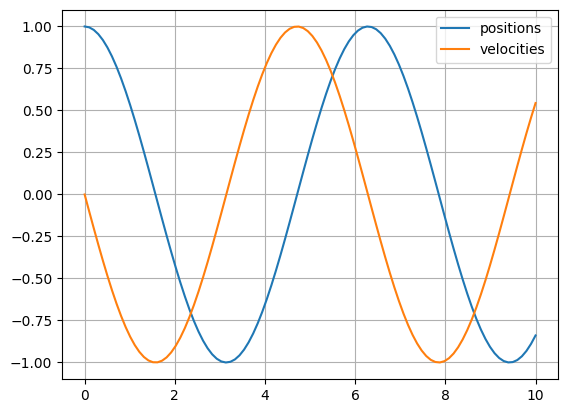

In [25]:
import matplotlib.pyplot as plt

plt.plot(time_points, positions, label='positions')
plt.plot(time_points, velocities, label='velocities')
plt.legend()
plt.grid()